In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
file_path = r"C:\Users\dhruv\Internship\Task_2\Global-Superstore-master\Global_Superstore(CSV).csv"
data = pd.read_csv(file_path)

selected_columns = ['Order Date', 'Segment', 'Region', 'Category', 'Product Name', 'Sales', 'Discount', 'Profit']
filtered_data = data[selected_columns]

output_path = r'C:\Users\dhruv\Internship\Task_2\Global-Superstore-master\filtered_superstore.csv'
filtered_data.to_csv(output_path, index=False)

output_path

'C:\\Users\\dhruv\\Internship\\Task_2\\Global-Superstore-master\\filtered_superstore.csv'

In [6]:
file_path1 = r'C:\Users\dhruv\Internship\Task_2\Global-Superstore-master\filtered_superstore.csv'
data1 = pd.read_csv(file_path1)
data1

,Order Date,Segment,Region,Category,Product Name,Sales,Discount,Profit
0,11/11/2014,Consumer,Central US,Technology,Samsung Convoy 3,221.98,0.00,62.15
1,2/5/2014,Corporate,Oceania,Furniture,"Novimex Executive Leather Armchair, Black",3709.40,0.10,-288.77
2,10/17/2014,Consumer,Oceania,Technology,"Nokia Smart Phone, with Caller ID",5175.17,0.10,919.97
3,1/28/2014,Home Office,Western Europe,Technology,"Motorola Smart Phone, Cordless",2892.51,0.10,-96.54
4,11/5/2014,Consumer,Western Africa,Technology,"Sharp Wireless Fax, High-Speed",2832.96,0.00,311.52
...,...,...,...,...,...,...,...,...
995,4/1/2015,Consumer,Eastern Asia,Furniture,"Bevis Wood Table, with Bottom Storage",2614.69,0.30,-821.96
996,12/9/2015,Corporate,Western US,Office Supplies,Belkin 8-Outlet Premiere SurgeMaster II Surge ...,69.48,0.00,20.84
997,10/17/2014,Consumer,Oceania,Technology,"Canon Fax Machine, Laser",636.78,0.00,286.50
998,1/19/2014,Corporate,South America,Furniture,"Bush Classic Bookcase, Traditional",2751.20,0.00,110.00


In [7]:
data1.isnull().sum()

Order Date      0
Segment         0
Region          0
Category        0
Product Name    0
Sales           0
Discount        0
Profit          0
dtype: int64

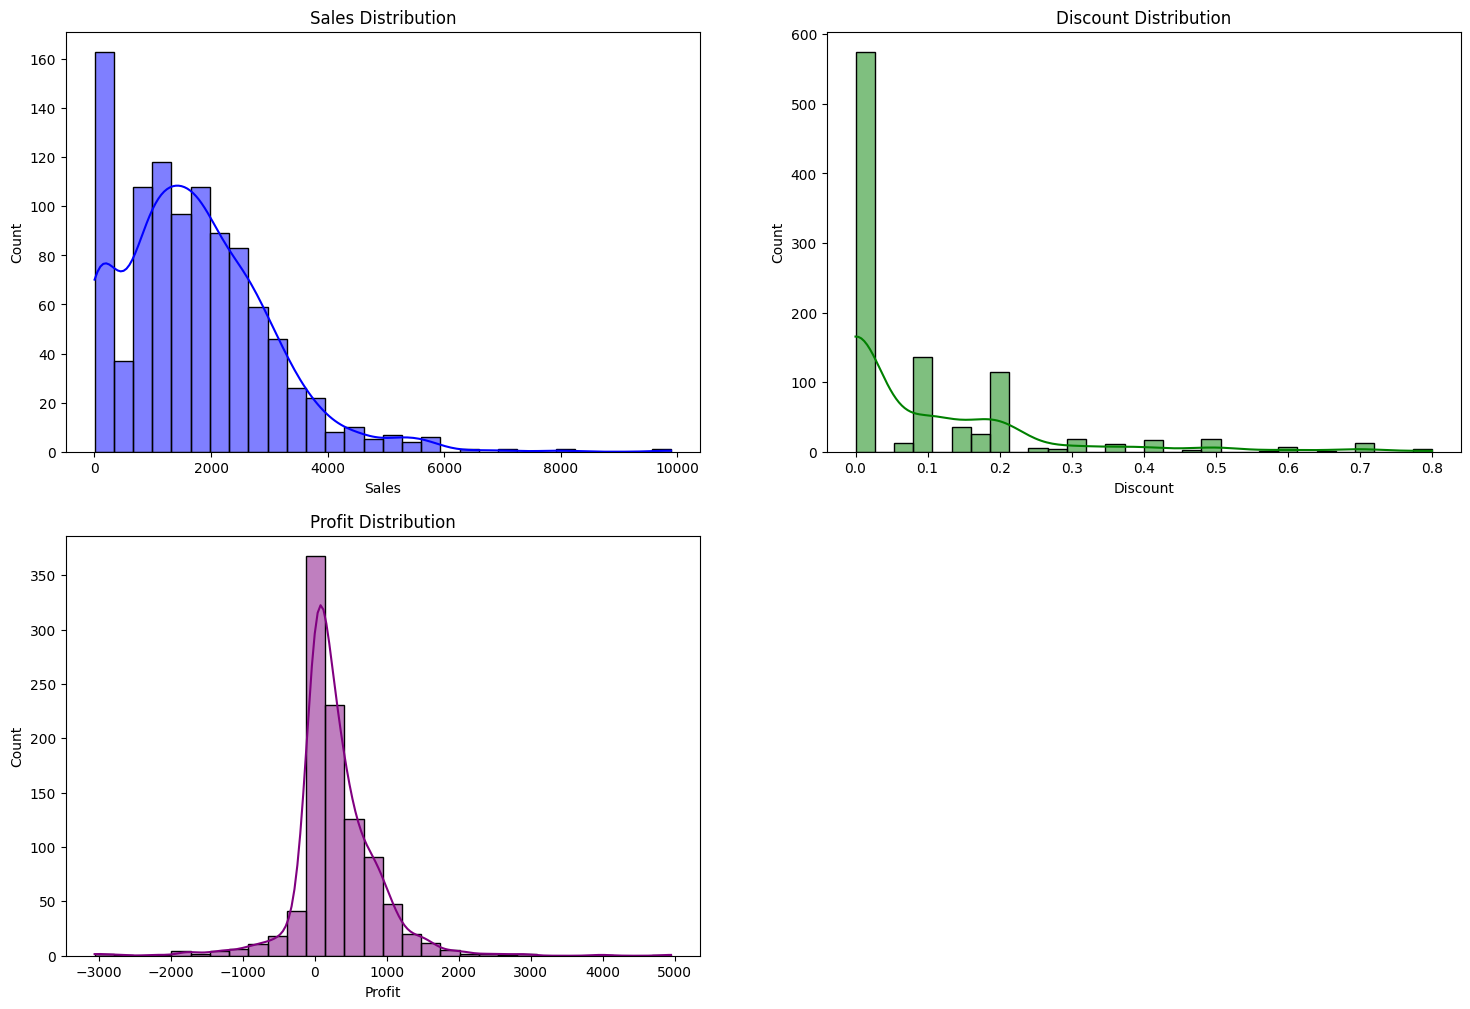

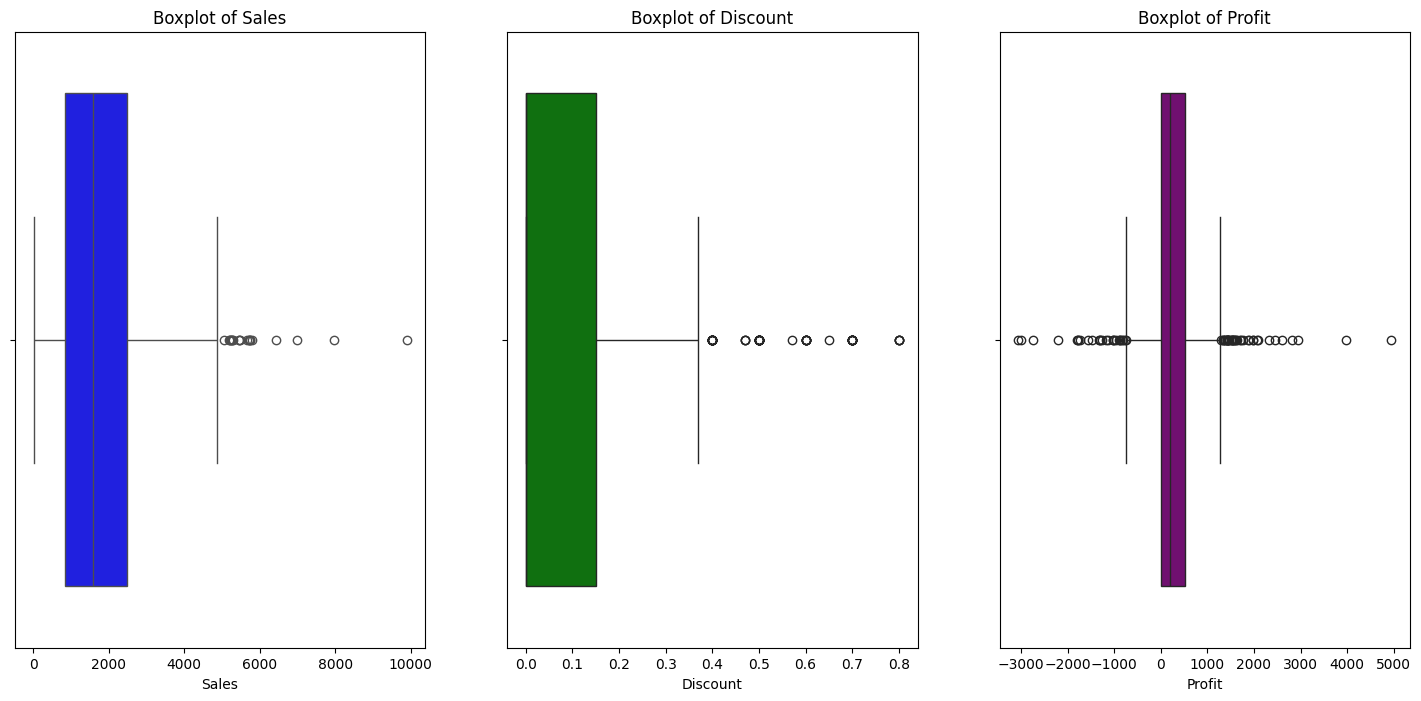

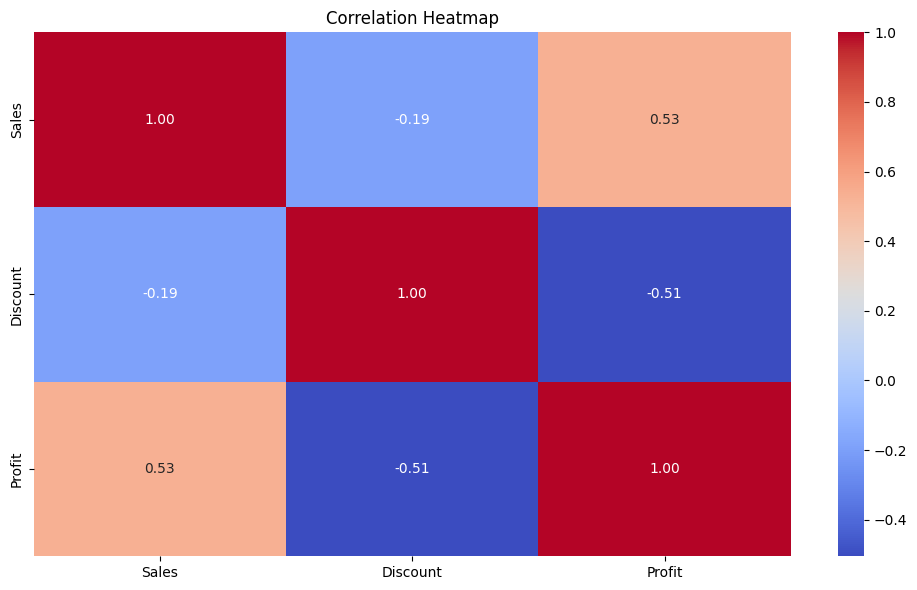

In [9]:
filtered_data = pd.read_csv(output_path)

plt.figure(figsize=(18, 12))

# Histogram for numerical data (Sales, Discount, Profit)
plt.subplot(2, 2, 1)
plt.title('Sales Distribution')
sns.histplot(filtered_data['Sales'], bins=30, kde=True, color='blue')

plt.subplot(2, 2, 2)
plt.title('Discount Distribution')
sns.histplot(filtered_data['Discount'], bins=30, kde=True, color='green')

plt.subplot(2, 2, 3)
plt.title('Profit Distribution')
sns.histplot(filtered_data['Profit'], bins=30, kde=True, color='purple')

# Boxplots to identify outliers
plt.figure(figsize=(18, 8))
plt.subplot(1, 3, 1)
plt.title('Boxplot of Sales')
sns.boxplot(x=filtered_data['Sales'], color='blue')

plt.subplot(1, 3, 2)
plt.title('Boxplot of Discount')
sns.boxplot(x=filtered_data['Discount'], color='green')

plt.subplot(1, 3, 3)
plt.title('Boxplot of Profit')
sns.boxplot(x=filtered_data['Profit'], color='purple')

# Correlation heatmap
plt.figure(figsize=(10, 6))
plt.title('Correlation Heatmap')
corr_matrix = filtered_data[['Sales', 'Discount', 'Profit']].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")

# Show all plots
plt.tight_layout()
plt.show()


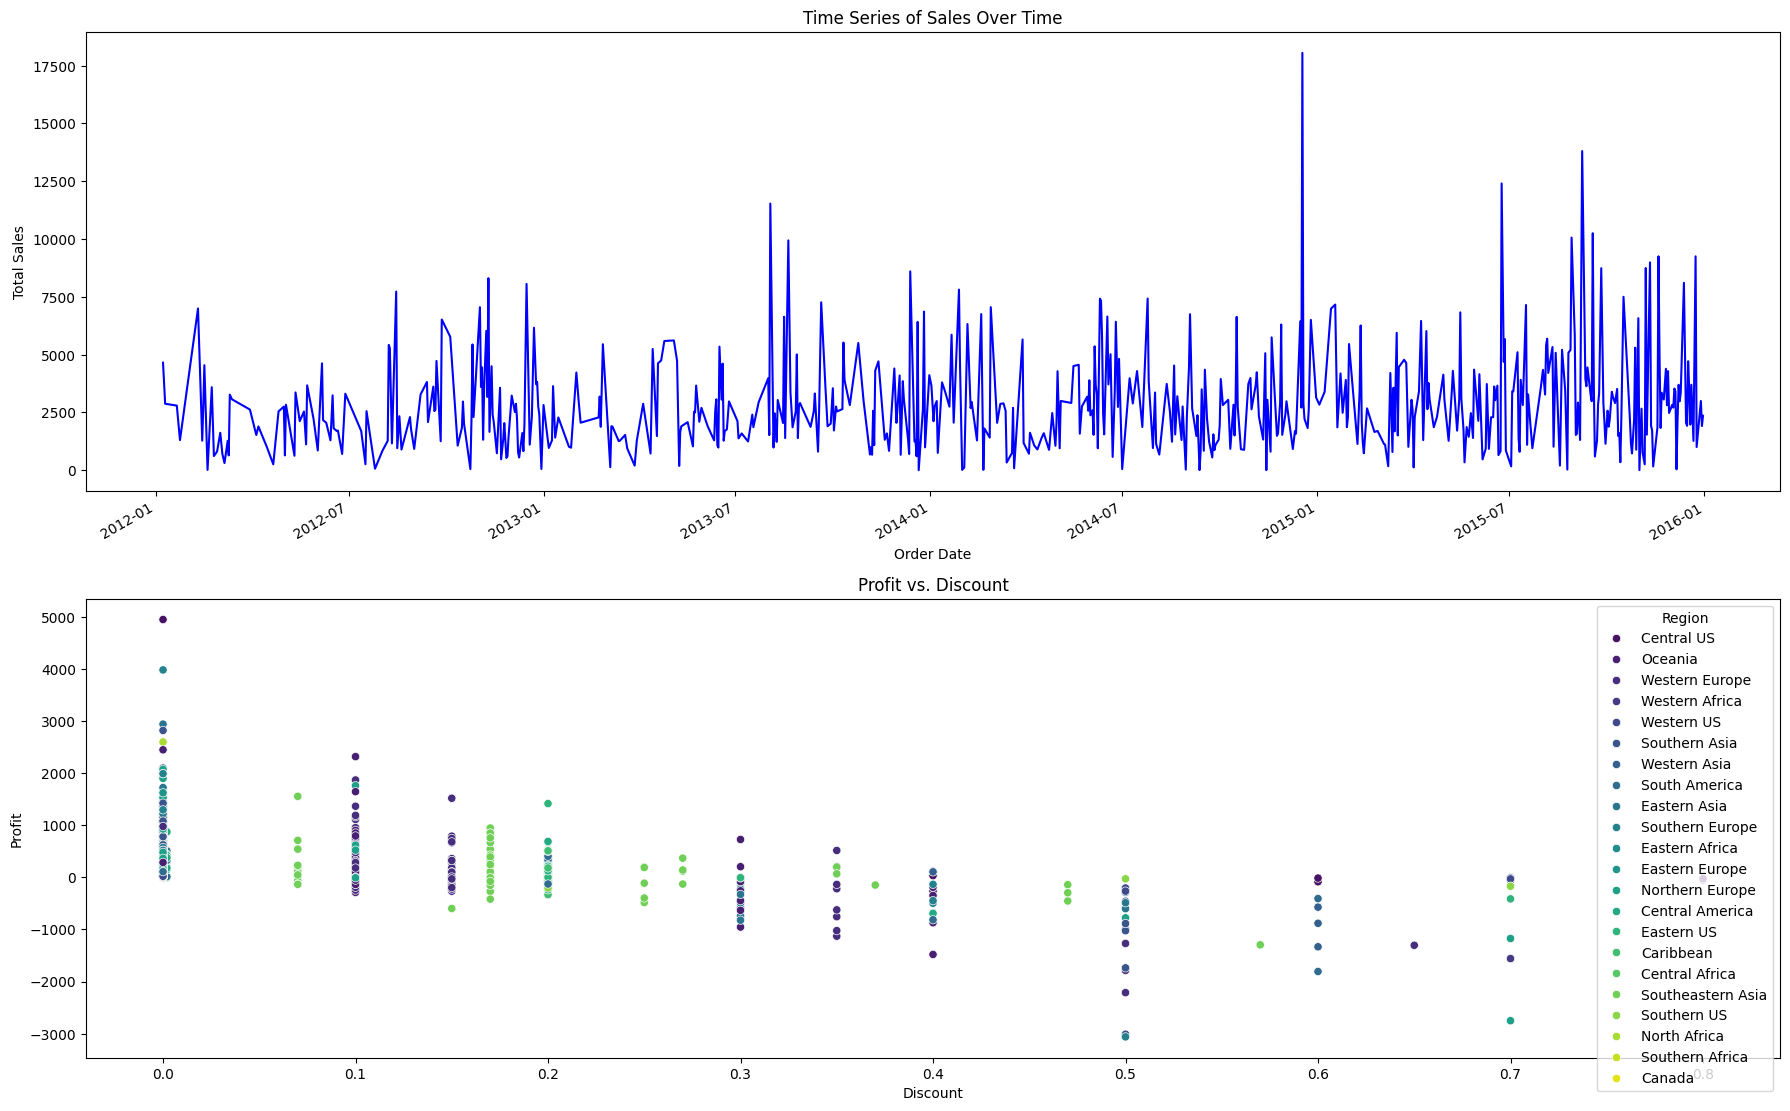

C:\Users\dhruv\AppData\Local\Temp\ipykernel_15392\1380439514.py:27: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=filtered_data, x='Region', y='Sales', hue='Category', ci=None)


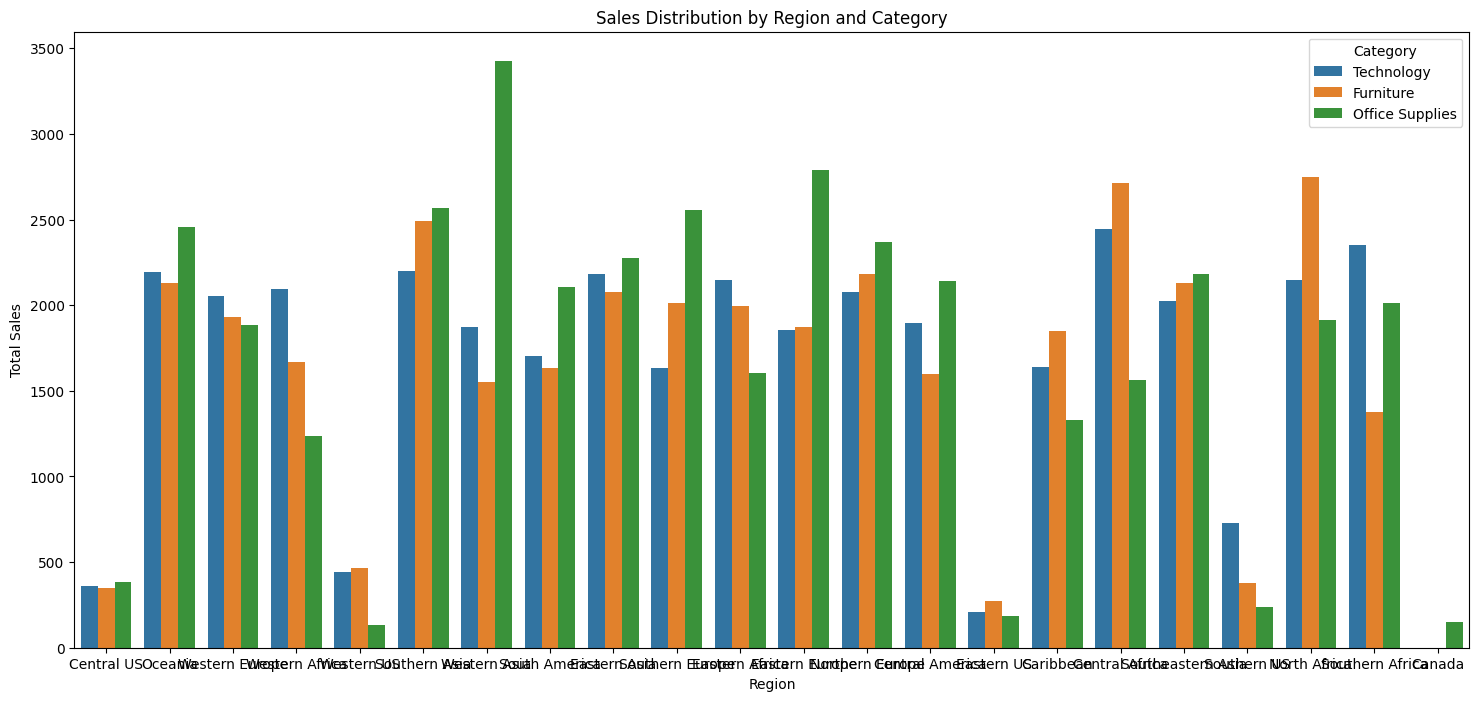

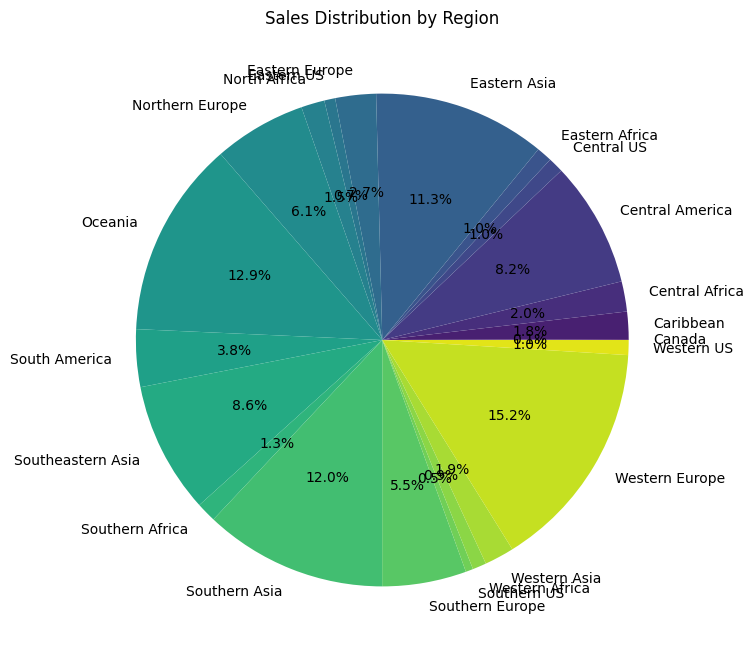

In [10]:
# Convert 'Order Date' to datetime format
filtered_data['Order Date'] = pd.to_datetime(filtered_data['Order Date'])

plt.figure(figsize=(18, 12))

# Time Series Plot for Sales over Time
plt.subplot(2, 1, 1)
plt.title('Time Series of Sales Over Time')
filtered_data.groupby('Order Date')['Sales'].sum().plot(color='blue')
plt.xlabel('Order Date')
plt.ylabel('Total Sales')

# Scatter Plot for Profit vs. Discount
plt.subplot(2, 1, 2)
plt.title('Profit vs. Discount')
sns.scatterplot(data=filtered_data, x='Discount', y='Profit', hue='Region', palette='viridis')
plt.xlabel('Discount')
plt.ylabel('Profit')

plt.tight_layout()
plt.show()

# Bar Plot for Sales by Region and Category
plt.figure(figsize=(18, 8))
plt.title('Sales Distribution by Region and Category')
sns.barplot(data=filtered_data, x='Region', y='Sales', hue='Category', ci=None)
plt.xlabel('Region')
plt.ylabel('Total Sales')
plt.show()

# Pie Chart for Sales by Region
plt.figure(figsize=(8, 8))
region_sales = filtered_data.groupby('Region')['Sales'].sum()
plt.title('Sales Distribution by Region')
plt.pie(region_sales, labels=region_sales.index, autopct='%1.1f%%', colors=sns.color_palette('viridis', len(region_sales)))
plt.show()


In [11]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Prepare the features and target variable
X = filtered_data[['Profit', 'Discount']]
y = filtered_data['Sales']

# Split the data into training and testing sets (80-20 split)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

model_coefficients = dict(zip(X.columns, model.coef_))
model_intercept = model.intercept_

model_coefficients, model_intercept, mse, r2


({'Profit': np.float64(1.250972619809361),
  'Discount': np.float64(856.8212510557091)},
 np.float64(1289.5673385112298),
 np.float64(768263.9714577636),
 0.3931631968113388)

Model Coefficients: {'Profit': np.float64(1.250972619809361), 'Discount': np.float64(856.8212510557091)}
Model Intercept: 1289.5673385112298
Mean Squared Error (MSE): 768263.9714577636
R-squared (R²) Score: 0.3931631968113388


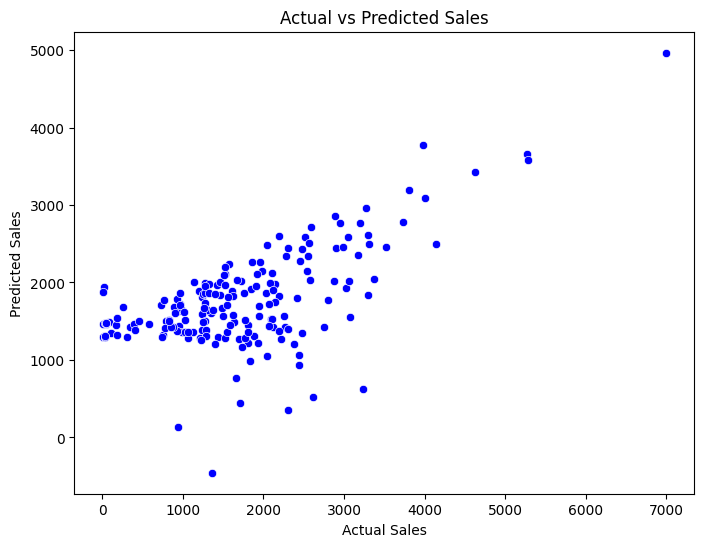

In [13]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns

# Load the filtered dataset
file_path = r'C:\Users\dhruv\Internship\Task_2\Global-Superstore-master\filtered_superstore.csv'
data = pd.read_csv(file_path)

# Convert 'Order Date' to datetime format
data['Order Date'] = pd.to_datetime(data['Order Date'])

# Prepare features and target variable
X = data[['Profit', 'Discount']]
y = data['Sales']

# Split the data into training and testing sets (80-20 split)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print('Model Coefficients:', dict(zip(X.columns, model.coef_)))
print('Model Intercept:', model.intercept_)
print('Mean Squared Error (MSE):', mse)
print('R-squared (R²) Score:', r2)

# Scatter plot for Actual vs Predicted Sales
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=y_pred, color='blue')
plt.xlabel('Actual Sales')
plt.ylabel('Predicted Sales')
plt.title('Actual vs Predicted Sales')
plt.show()


C:\Users\dhruv\AppData\Local\Temp\ipykernel_15392\3470052145.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(data=filtered_data, x='Discount', y='Profit', marker='o', ci=None)


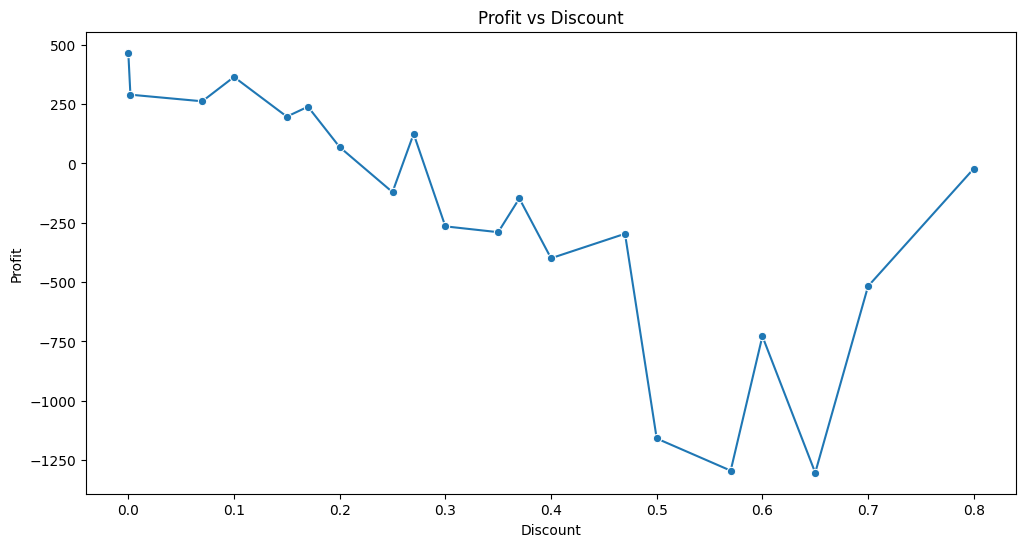

C:\Users\dhruv\AppData\Local\Temp\ipykernel_15392\3470052145.py:25: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=filtered_data, x='Region', y='Sales', hue='Category', ci=None)


Top-Performing Regions:
                        Sales    Profit
Region                                
Western Europe     259576.28  32783.40
Oceania            220809.08  33777.56
Southern Asia      205466.26  37536.60
Eastern Asia       193590.60  37911.16
Southeastern Asia  147337.60  10561.80
Central America    140966.21  21741.95
Northern Europe    103888.63  23552.73
Southern Europe     94441.11  20557.50
South America       64550.54   7723.58
Eastern Europe      45662.19  12228.45
Central Africa      33810.48   9668.22
Western Asia        33308.21   5262.35
Caribbean           30746.74   5463.82
North Africa        26266.44   7416.42
Southern Africa     22262.28   4876.32
Eastern Africa      17387.94   4302.72
Central US          17187.94   5676.02
Western US          16729.95   2458.34
Western Africa      15478.79   1278.17
Eastern US          12256.44   2544.89
Southern US          8360.75   1384.72
Canada                887.01    213.72

Top-Performing Categories:
           

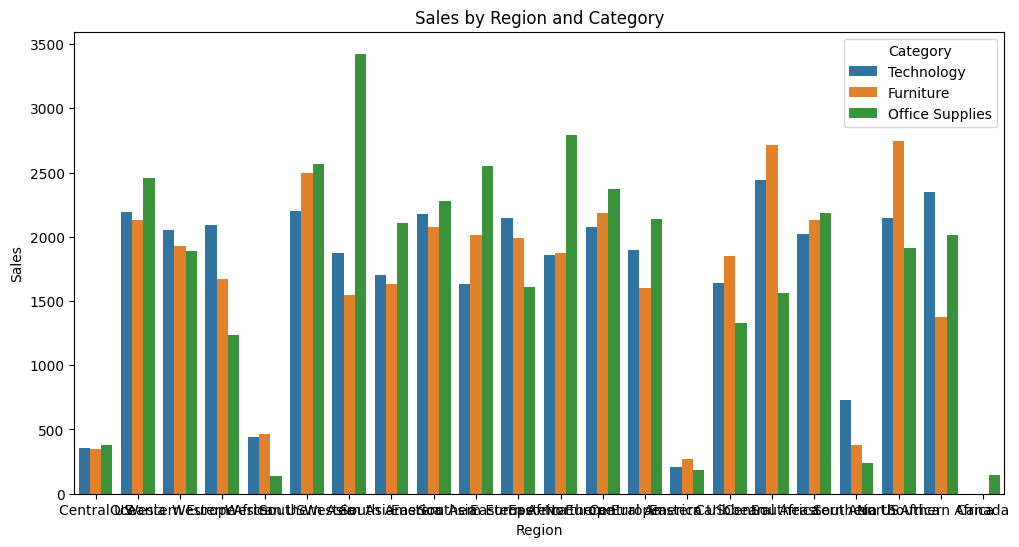

In [17]:
# Analyzing Optimal Discount Rates
plt.figure(figsize=(12, 6))
sns.lineplot(data=filtered_data, x='Discount', y='Profit', marker='o', ci=None)
plt.title('Profit vs Discount')
plt.xlabel('Discount')
plt.ylabel('Profit')
plt.show()


# Top-Performing Regions
top_regions = filtered_data.groupby('Region')[['Sales', 'Profit']].sum().sort_values(by='Sales', ascending=False)
print("Top-Performing Regions:\n", top_regions)

# Top-Performing Categories
top_categories = filtered_data.groupby('Category')[['Sales', 'Profit']].sum().sort_values(by='Sales', ascending=False)
print("\nTop-Performing Categories:\n", top_categories)

# Analyzing the impact of Profit and Discount on Sales
corr_matrix = filtered_data[['Sales', 'Profit', 'Discount']].corr()
print("\nCorrelation Matrix:\n", corr_matrix)


# Visualization: Sales by Region and Category
plt.figure(figsize=(12, 6))
sns.barplot(data=filtered_data, x='Region', y='Sales', hue='Category', ci=None)
plt.title('Sales by Region and Category')
plt.show()
